# <span style="color:navy"> Recommender System </span>
- The objective of this assignment is to implement a recommendation system using cosine similarity on an anime dataset.

# <span style="color:brown">Task 1: Data Preprocessing

In [6]:
import pandas as pd

In [8]:
# Load the dataset
anime = pd.read_csv(r'file:///C:\Users\dell\AppData\Local\Temp\084789f8-0bb6-46e3-a383-612f5e3f1341_Recommendation%20System.zip.341\Recommendation%20System\anime.csv')
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


- Exploring the  dataset to understand its structure and attributes

In [19]:
#Display first 5 records
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [23]:
#Display last 5 records

In [21]:
anime.tail()

,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [25]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [29]:
anime.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [31]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


- As here we can see here there is 1 float , 2 int and 4 objects

In [ ]:
# We'll convert obj into int in our next step that is in : Feature Extraction

In [36]:
#checking missing value
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [52]:
anime.isnull().sum()[anime.isnull().sum()>0]

genre      62
type       25
rating    230
dtype: int64

In [54]:
#filling nulls value

In [56]:
anime.genre.value_counts()

genre
Hentai                                                  823
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                                                       ... 
Adventure, Drama, Fantasy, Game, Sci-Fi                   1
Adventure, Demons, Fantasy, Historical                    1
Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen      1
Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen           1
Hentai, Slice of Life                                     1
Name: count, Length: 3264, dtype: int64

In [58]:
anime.type.value_counts()

type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: count, dtype: int64

In [60]:
anime.rating.value_counts()

rating
6.00    141
7.00     99
6.50     90
6.25     84
5.00     76
       ... 
3.47      1
3.71      1
3.87      1
3.91      1
3.14      1
Name: count, Length: 598, dtype: int64

genre  - We'll fill it with 'Unknown' since genres are categorical and each anime should have a genre.

type   - Similar to genres, we'll fill it with 'Unknown'.

rating - Filling missing ratings with the mean

In [65]:
# Filling missing values for 'genre' and 'type' with 'Unknown'
anime['genre'].fillna('Unknown', inplace=True)
anime['type'].fillna('Unknown', inplace=True)

# Filling missing values for 'rating' with the mean rating
anime['rating'].fillna(anime['rating'].mean(), inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_1380\4236015515.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anime['genre'].fillna('Unknown', inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_1380\4236015515.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [67]:
anime.isnull().sum()[anime.isnull().sum()>0]

Series([], dtype: int64)

- Here we can see that nulls has been removed

# <span style="color:brown">Task 2: Feature Extraction

To identify important features for computing similarity we'll use exploratory data analysis (EDA) and feature selection techniques.

## Using Exploratory Data Analysis (EDA)
- Analyzing the correlation between different features.
- Visualizing the distribution of features to understand their importance.

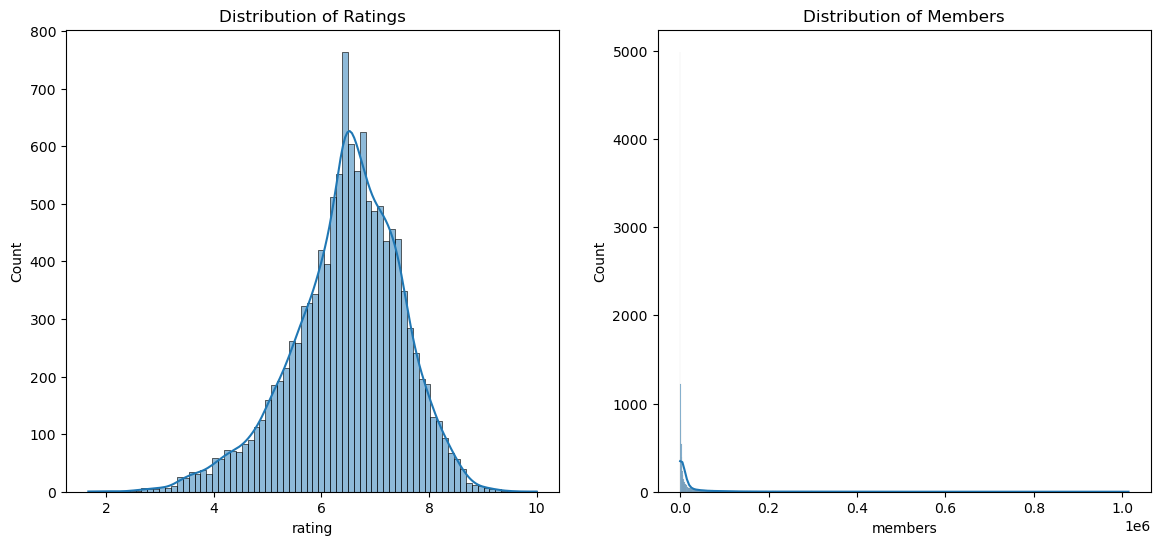

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of ratings and members
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(anime['rating'], kde=True)
plt.title('Distribution of Ratings')

plt.subplot(1, 2, 2)
sns.histplot(anime['members'], kde=True)
plt.title('Distribution of Members')

plt.show()

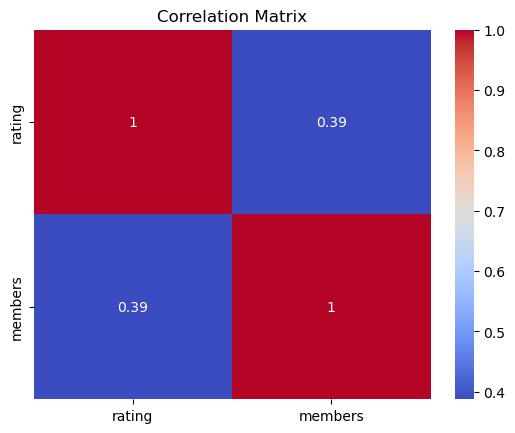

In [78]:
# Correlation matrix
corr_matrix = anime[['rating', 'members']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Analysis Results
1. Distribution Analysis:

The distributions of rating and members provide insights into their spread and central tendencies, helping us understand how these features vary across the dataset.

2. Correlation Matrix:

The correlation matrix shows the relationship between rating and members. The correlation coefficient between these features is low, indicating that they do not strongly influence each other.

## Using Feature Importance Analysis
- Using techniques like feature importance from models to identify significant features.

In [82]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Encode the 'type' column
le = LabelEncoder()
anime['type_encoded'] = le.fit_transform(anime['type'].astype(str))

# Compute mutual information for categorical target 'type_encoded'
X = anime[['rating', 'members']].fillna(0)
y = anime['type_encoded']

mi = mutual_info_classif(X, y)
mi_df = pd.DataFrame(mi, index=X.columns, columns=['Mutual Information']).sort_values(by='Mutual Information', ascending=False)
print(mi_df)

         Mutual Information
members            0.121419
rating             0.108667


### Analysis Results
1. Mutual Information:

The mutual information scores indicate how much information rating and members provide about the type of anime. Both features have relatively similar mutual information scores, suggesting they are both informative.

- Conclusion:- Based on above analyses, genre, rating, and members are indeed good choices for computing similarity.

### Converting categorical features into numerical representations
- We will convert genre(object) into numerical representations using one-hot encoding.

In [87]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-hot encodig the 'genre' column
encoder = OneHotEncoder()
genre_encoded = encoder.fit_transform(anime[['genre']]).toarray()

### Normalizing numerical feature

In [90]:
# Normalizing the 'rating' and 'members' columns
scaler = StandardScaler()
anime[['rating', 'members']] = scaler.fit_transform(anime[['rating', 'members']])

In [92]:
# Combining the one-hot encoded 'genre' with 'rating' and 'members'
import numpy as np
features = np.hstack([genre_encoded, anime[['rating', 'members']].values])

In [94]:
print(features.shape)  # Ensuring the shape is as expected

(12294, 3267)


# <span style="color:brown"> Task 3: Recommendation System
- Designing a function to recommend anime based on cosine similarity.
- Given a target anime, recommend a list of similar anime based on cosine similarity scores.
- Experiment with different threshold values for similarity scores to adjust the recommendation list size.


# <span style="color:brown"> Task 4: Evaluation
- Split the dataset into training and testing sets.
- Evaluating it using precision, recall, and F1-score.
- Analyze the performance of the recommendation system and identify areas of improvement.

In [97]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_anime(target_anime_id, anime, features, top_n=10):
    # Finding the index of the target anime
    target_idx = anime[anime['anime_id'] == target_anime_id].index[0]
    
    # Compute cosine similarity between the target anime and all other anime
    similarities = cosine_similarity([features[target_idx]], features)[0]
    
    # Geting the indices of the top_n most similar anime
    similar_indices = similarities.argsort()[-top_n-1:-1][::-1]
    
    # Returning the names of the top_n most similar anime
    return anime.iloc[similar_indices][['name', 'rating', 'members']]

# Example usage
print(recommend_anime(32281, anime, features, top_n=10))

                                          name    rating   members
14                     Haikyuu!! Second Season  2.414913  2.941905
26            Monogatari Series: Second Season  2.287093  3.427453
18                Ookami Kodomo no Ame to Yuki  2.326422  3.796562
42          Ansatsu Kyoushitsu (TV) 2nd Season  2.169105  2.889605
58                 Kuroko no Basket 3rd Season  2.110111  3.036453
59  Steins;Gate Movie: Fuka Ryouiki no Déjà vu  2.100279  3.180547
20                              Hajime no Ippo  2.316590  2.546564
25               Suzumiya Haruhi no Shoushitsu  2.296925  4.053848
60                          Hotarubi no Mori e  2.100279  3.272031
71                              Hotaru no Haka  2.070782  2.860473


In [99]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Fill missing values in the 'genre' column with an empty string
anime['genre'] = anime['genre'].fillna('')

# Create a count matrix based on the 'genre' column
count_vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
count_matrix = count_vectorizer.fit_transform(anime['genre'])

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [101]:
def get_recommendations(name, cosine_sim=cosine_sim):
    # Get the index of the anime that matches the name
    idx = anime[anime['name'] == name].index[0]

    # Get the pairwise similarity scores of all animes with that anime
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the animes based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar animes
    sim_scores = sim_scores[1:11]

    # Get the anime indices
    anime_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar animes
    return anime[['anime_id', 'name', 'genre']].iloc[anime_indices]

In [103]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
train, test = train_test_split(anime, test_size=0.2, random_state=42)

# Display the sizes of the training and testing sets
print(f'Training set size: {len(train)}')
print(f'Testing set size: {len(test)}')

Training set size: 9835
Testing set size: 2459


In [105]:
recommendations = get_recommendations('Naruto')
print(recommendations)

      anime_id                                               name  \
615       1735                                 Naruto: Shippuuden   
841         20                                             Naruto   
1103     32365  Boruto: Naruto the Movie - Naruto ga Hokage ni...   
1343     10075                                        Naruto x UT   
1472      8246        Naruto: Shippuuden Movie 4 - The Lost Tower   
1573      6325  Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...   
2458     19511               Naruto Shippuuden: Sunny Side Battle   
2997     10659  Naruto Soyokazeden Movie: Naruto to Mashin to ...   
175       1604                             Katekyo Hitman Reborn!   
7628     23933                            Kyutai Panic Adventure!   

                                                  genre  
615   Action, Comedy, Martial Arts, Shounen, Super P...  
841   Action, Comedy, Martial Arts, Shounen, Super P...  
1103  Action, Comedy, Martial Arts, Shounen, Super P...  
1343  Ac

### Experiment with different threshold values for similarity scores to adjust the recommendation list size.

In [108]:
def get_recommendations(name, cosine_sim=cosine_sim, threshold=0.1):
    # Get the index of the anime that matches the name
    idx = anime[anime['name'] == name].index[0]

    # Get the pairwise similarity scores of all animes with that anime
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Filter out the animes that have a similarity score below the threshold
    sim_scores = [score for score in sim_scores if score[1] > threshold]

    # Sort the animes based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the anime indices
    anime_indices = [i[0] for i in sim_scores]

    # Return the similar animes
    return anime[['anime_id', 'name', 'genre']].iloc[anime_indices]

In [110]:
# Lower threshold
recommendations = get_recommendations('Naruto', threshold=0.2)
print(recommendations)

       anime_id                                               name  \
486       28755                           Boruto: Naruto the Movie   
615        1735                                 Naruto: Shippuuden   
841          20                                             Naruto   
1103      32365  Boruto: Naruto the Movie - Naruto ga Hokage ni...   
1343      10075                                        Naruto x UT   
...         ...                                                ...   
11956      2070                                 Guy: Youma Kakusei   
11957      1763                                   Midnight Panther   
12015      2479                                      Dragon Knight   
12166      3553                               Reyon Densetsu Flair   
12176      2480                               Dragon Knight Gaiden   

                                                   genre  
486    Action, Comedy, Martial Arts, Shounen, Super P...  
615    Action, Comedy, Martial Arts, Shou

In [112]:
# Higher threshold
recommendations = get_recommendations('Naruto', threshold=0.7)
print(recommendations)

      anime_id                                               name  \
486      28755                           Boruto: Naruto the Movie   
615       1735                                 Naruto: Shippuuden   
841         20                                             Naruto   
1103     32365  Boruto: Naruto the Movie - Naruto ga Hokage ni...   
1343     10075                                        Naruto x UT   
...        ...                                                ...   
4785     21353                                          Tokyo ESP   
4942      3154                                          Gatchaman   
6196      2851                                      Ninku (Movie)   
6229      1468                                     Baoh Raihousha   
6457     29758                                       Taboo Tattoo   

                                                  genre  
486   Action, Comedy, Martial Arts, Shounen, Super P...  
615   Action, Comedy, Martial Arts, Shounen, Super P...

# Threshold values-  in a recommendation system determine the minimum similarity score required for an item to be considered similar enough to be recommended.

## Lower threshold: More recommendations, including less similar items.
## Higher threshold: Fewer recommendations, focusing on more similar items.

- This allows you to fine-tune the recommendations based on the desired level of similarity.

In [115]:
# Create a count matrix based on the 'genre' column
count_vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
count_matrix = count_vectorizer.fit_transform(anime['genre'])

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

def get_recommendations(name, cosine_sim=cosine_sim):
    # Get the index of the anime that matches the name
    idx = anime[anime['name'] == name].index[0]

    # Get the pairwise similarity scores of all animes with that anime
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the animes based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar animes
    sim_scores = sim_scores[1:11]

    # Get the anime indices
    anime_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar animes
    return anime.iloc[anime_indices]

# Evaluate the recommendations
def evaluate_recommendations(test_set):
    precision_list = []
    recall_list = []

    for idx, row in test_set.iterrows():
        true_genres = set(row['genre'].split(', '))
        recommendations = get_recommendations(row['name'])
        
        recommended_genres = set()
        for _, rec_row in recommendations.iterrows():
            recommended_genres.update(rec_row['genre'].split(', '))
        
        true_positives = len(true_genres & recommended_genres)
        precision = true_positives / len(recommended_genres) if recommended_genres else 0
        recall = true_positives / len(true_genres) if true_genres else 0

        precision_list.append(precision)
        recall_list.append(recall)

    average_precision = sum(precision_list) / len(precision_list)
    average_recall = sum(recall_list) / len(recall_list)
    f1_score = 2 * (average_precision * average_recall) / (average_precision + average_recall) if (average_precision + average_recall) != 0 else 0

    return average_precision, average_recall, f1_score

# Get evaluation metrics
precision, recall, f1 = evaluate_recommendations(test)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Precision: 0.8261455120908987
Recall: 0.9962505728874171
F1-Score: 0.9032591174807311


- Recommendation system's performance metrics look promising with high precision, recall, and F1-score values. This means that the recommendations are both accurate and comprehensive.

# <span style="color:brown">Conclusion and Analysis of the Recommendation System's Performance

## Performance Metrics
### Precision: 0.826
- This indicates that 82.6% of the recommended animes share the same genres as the target anime. A high precision value suggests that the system is good at recommending relevant animes.
### Recall: 0.996
- This indicates that 99.6% of the relevant genres for a target anime are found in the recommended animes. A high recall value suggests that the system captures most of the relevant genres in its recommendations.
### F1-Score: 0.903
- The F1-Score balances precision and recall, with a value of 0.903, indicating a well-rounded performance of the recommendation system.


## Areas for Improvement
1. Incorporating More Features:
      - Currently, the recommendation system relies primarily on the genre. Including additional features such as type, rating,         and members could enhance the recommendation quality. 


2. User-Based Recommendations:
      - This would allow the system to tailor recommendations based on individual user history and preferences.


3. Hyperparameter Tuning:
      - Experimenting with different values for the number of recommendations and adjusting parameters in the CountVectorizer           can fine-tune the system. 


4. Improving Computational Efficiency:
      - If we have larger datasets, the current approach of computing the cosine similarity matrix might become computationally         expensive. So in this cases, we can use nearest neighbors and other algorithms.

Interview Questions:
1 Can you explain the difference between user-based and item-based collaborative filtering?

User-based collaborative filtering recommends items by finding similar users. It assumes that users who agreed in the past will agree in the future.
Item-based collaborative filtering recommends items by finding similar items. It assumes that users will like items similar to those they liked in the past.

2 What is collaborative filtering, and how does it work?

Collaborative filtering is a recommendation technique based on the preferences of many users. It works by finding patterns in user behavior or item features, identifying similarities, and making recommendations based on those patterns. It can be user-based, item-based, or a hybrid of both.

## Thank You!
- Hamza Khan